<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

    

<b>Éxito</b> ✅ - ¡Excelente trabajo! Tu proyecto es excepcional y has logrado cubrir los objetivos del mismo. Abajo he dejado mis comentarios y unas pequeñas recomendaciones para que tomes en cuenta en un futuro y te hagan ¡un máster en Data!

¡Felicidades!    

</div>



<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Hola Edgar! Veo que has avanzado (pero solo parcialmente, y esto puede afectarte en la siguiente fase de implementación y código):

1. ya definiste umbrales (500, ≥2, <25) y un plan de actividades por semanas,
2. pero falta pulir las fórmulas explícitas, la confirmación de unidades y un cronograma con tiempos concretos ajustados a las 2 semanas. ✅💡

### Recomendación práctica de como pudes avanzar en la siguiente fase de implementación:

Confirma la unidad de tiempo en las columnas de tiempo (tu mas que nadie sabe lo que significa y lo que piensas transmitir a tus stakeholders)🔎  

**Una forma de definirlas es la siguiente (no una regla a seguir pero que te puede ayudar en la siguiente fase)**:

- Fórmulas claras por operador y por periodo (ej.: trimestre):  
  - wait_minutes_per_operator = df.groupby(['operator_id', periodo])['wait_minutes'].sum()  
  - missed_calls_count = df[(df.direction=='in') & (df.is_missed_call)].groupby(['operator_id', periodo])['calls_count'].sum()  
  - outgoing_calls_count = df[(df.direction=='out') & (~df.internal)].groupby(['operator_id', periodo])['calls_count'].sum()  
- Reglas/flags con umbrales:  
  - flag_wait = wait_minutes_per_operator > 500  
  - flag_missed = missed_calls_count >= 2  
  - flag_outgoing = outgoing_calls_count < 25  
  - target_ineficiente = flag_wait | flag_missed | flag_outgoing

**Y para ayudarte un poco sobre el cronograma:**

Cronograma compacto sugerido (2 semanas) con tiempos estimados:  
- Día 1: Validar tipos y unidades + tratar nulos (0.5d) ✅  
- Día 1–2: Agregaciones por operador y creación de KPIs (1.0d) ✅  
- Día 3–4: EDA por KPI + visualizaciones (1.0d) 📊  
- Día 5: Definir y justificar umbrales (0.5d) 🧭  
- Semana 2 (3 días): Pruebas estadísticas y validación de reglas (1.5d) 🧪  
- Semana 2 (2 días): Dashboard preliminar + informe ejecutivo (1.0d) 📝  
- Resto: ajustes y otras tareas (1.5d) 🔁

### **Para la siguiente fase de proyecto, te recomiendo:**

Documentar la justificación de cada umbral y unidad de tiempo utilizada (por qué 500 min/trim., por qué 2 llamadas, etc.), de lo contrario, tu proyecto va a ser rechazado muchas veces y quiero ayudarte a evitarlo.

Por otro lado, añade las fórmulas en Markdown junto al código (con esto dejas claro tus conclusiones y no dejas cabos sueltos sobre tu forma de abordar el problema). Con eso quedas listo para que no tengas problemas en la fase de implementación.  🚀
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces


# Problema de negocio

La empresa esta implementando una nueva funcion para la ineficiencia debido a llamadas perdidas y tiempos de espera excesivos que causan cancelaciones de clientes. Necesitamos identificar qué operadores generan estos problemas para optimizar el servicio y reducir la pérdida de ingresos.


# Plan de acciones

## Semana 1

### Limpieza y Refinamiento del Análisis:
Durante la primera semana, nos enfocaremos en refinar la preparación de datos y comenzar a formalizar las métricas clave.

* Limpieza: Revisión y Documentación del Tratamiento de Nulos: Revisar y documentar el tratamiento actual de valores nulos, especialmente en la columna 'operator_id', asegurando que la justificación para su eliminación esté clara y sea consistente con los objetivos del análisis.

* Limpieza: Identificación y Tratamiento Formal de Outliers: Implementar métodos más formales para la identificación y tratamiento de valores atípicos en variables clave como 'tiempos_espera', 'calls_count', 'call_duration' y 'total_call_duration', ajustando los umbrales de ineficiencia si es necesario.

* Limpieza:  Consolidación de Tipos de Datos: Asegurar que todos los tipos de datos sean consistentes y apropiados para el análisis, prestando especial atención a las conversiones de fechas y a la validación de la columna 'internal' (internas/externas).

* Análisis: Definición Formal de KPIs y Fórmulas: Definir explícitamente los Indicadores Clave de Rendimiento (KPIs), junto con los umbrales específicos para identificar a los operadores ineficaces.

* Análisis: Agregación de Métricas por Operador: Calcular y agregar las métricas clave y los KPIs definidos para cada 'operator_id', preparando los datos para análisis comparativos y pruebas estadísticas por operador.

## Semana 2

### Análisis Avanzado y Comunicación de Resultados:
La segunda semana se centrará en profundizar el análisis, validar hipótesis estadísticas y preparar los entregables clave.

* Análisis: Implementación de Scoring o Clustering de Operadores: Desarrollar un sistema de puntuación simple o utilizar técnicas de clustering para agrupar a los operadores en diferentes categorías de rendimiento, basándose en los KPIs.

* Análisis: Revalidación de Pruebas Estadísticas: Revisar y, si es necesario, rehacer las pruebas de hipótesis estadísticas utilizando métodos más adecuados para proporciones y asegurando que las observaciones estén agrupadas por 'operator_id' para mantener la independencia.

* Comunicación: Planificación y Diseño de Dashboard: Diseñar la estructura y los componentes visuales clave para un dashboard interactivo que muestre los KPIs principales y permita la exploración del rendimiento de los operadores.

* Comunicación: Preparación de Informe Ejecutivo: Elaborar un borrador de informe ejecutivo que resuma los hallazgos clave, los operadores identificados como ineficaces, las causas probables y las recomendaciones estratégicas para la mejora del servicio.

* Comunicación: Identificación y Estrategia de Stakeholders: Desarrollar un plan de comunicación para los stakeholders identificados, adaptando el mensaje y los entregables a las necesidades e intereses de cada grupo

## 1. Lleva a cabo el análisis exploratorio de datos
En este paso vamos a identificar el tamaño del dataset, revisar los tipos de variables y verificar si hay valores ausentes o duplicados. Tambien identificaremos valores atipicos y valores nulos y como tratarlos.


In [ ]:
import pandas as pd

dataset=pd.read_csv('telecom_dataset_new.csv')
clients=pd.read_csv('telecom_clients.csv')

dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [ ]:
print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [ ]:
dataset.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


In [ ]:
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [ ]:
print(clients.info())
print(clients.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
user_id        0
tariff_plan    0
date_start     0
dtype: int64


# 2.Limpieza y preparacion de datos
En esta etapa llevaremos a cabo la eliminacion de datos duplicados, el tratamiento de valores nulos y normalizacion de formatos

In [ ]:
# Tratamiento de datos nulos
dataset.isnull().sum()
dataset.dropna(inplace=True)

**NOTA:** Decidi eliminar los datos ausentes por la razon de que todos los datos ausentes se encontraban en la columna 'operator_id' y el objetivo de todo el analisis es identificar operadores ineficaces por lo tanto no nos sirve saber los datos de una llamada sin saber que operador fue.

In [ ]:
# Eliminacion de filas duplicadas
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [ ]:
# Normalizacion de farmatos
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.strftime('%Y-%m-%d')

dataset['operator_id'] = dataset['operator_id'].astype(str)
dataset['user_id']=dataset['user_id'].astype(str)
clients['user_id']=clients['user_id'].astype(str)
dataset['internal']=dataset['internal'].astype(bool)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              41491 non-null  object
 1   date                 41491 non-null  object
 2   direction            41491 non-null  object
 3   internal             41491 non-null  bool  
 4   operator_id          41491 non-null  object
 5   is_missed_call       41491 non-null  bool  
 6   calls_count          41491 non-null  int64 
 7   call_duration        41491 non-null  int64 
 8   total_call_duration  41491 non-null  int64 
dtypes: bool(2), int64(3), object(4)
memory usage: 2.6+ MB


##  3. Definicion de KPIs

* **Operadores ineficientes por tiempo de espera:**
  
Se define un operador ineficiente para los que tienen mas de 500 minutos/trimestre de tiempo de espera.

* **Operadores ineficientes por llamadas entrantes perdidas:**
  
Se define un operador ineficiente para los que tienen igual o mas de 2 llamadas perdidas/trimestre.

* **Operadores ineficientes por cantidad de llamadas salientes**

Se define un operador ineficiente cuando tiene menos de 25 llamadas salientes/cuatrimestre (solo cuando la llamada sea externa)


In [ ]:
tabla_combinada=pd.merge(dataset,clients,on='user_id',how='left')
tabla_combinada.groupby(['operator_id']).nunique()['tariff_plan'].max()


1

**Nota:** Con el codigo de la celda[9] confirme que cada operador trabaja solamente en una sola tarifa.

In [ ]:
# Operadores ineficientes por tiempo de espera
tabla_combinada['tiempos_espera']=tabla_combinada['total_call_duration']-tabla_combinada['call_duration']
llamadas_entrantes=tabla_combinada[tabla_combinada['direction']=='in']

operadores_ineficientes__tiempo_de_espera=llamadas_entrantes[['user_id','tariff_plan','tiempos_espera']][llamadas_entrantes['tiempos_espera']>500]

In [ ]:
# Operadores ineficientes por llamadas entrantes perdidas
tabla_llamadas_perdidas=tabla_combinada[tabla_combinada['is_missed_call']==True]
tabla_llamadas_entrantes_perdidas=tabla_llamadas_perdidas[tabla_llamadas_perdidas['direction']=='in']


operadores_ineficientes__llamadas_entrantes_perdidas=tabla_llamadas_entrantes_perdidas[['user_id','tariff_plan','calls_count']][tabla_llamadas_entrantes_perdidas['calls_count']>=2]
operadores_ineficientes__llamadas_entrantes_perdidas=operadores_ineficientes__llamadas_entrantes_perdidas.groupby('tariff_plan')['user_id'].count()
operadores_ineficientes__llamadas_entrantes_perdidas=operadores_ineficientes__llamadas_entrantes_perdidas.reset_index()

In [ ]:
# Operadores ineficientes por cantidad de llamadas salientes
tabla_llamadas_salientes=tabla_combinada[tabla_combinada['direction']=='out']
tabla_llamadas_salientes_exteriores=tabla_llamadas_salientes[tabla_llamadas_salientes['internal']==False]

operadores_ineficientes_cantidad_llamadas_salientes=tabla_llamadas_salientes_exteriores[['user_id','tariff_plan','calls_count']][tabla_llamadas_salientes_exteriores['calls_count']<30]
operadores_ineficientes_cantidad_llamadas_salientes=operadores_ineficientes_cantidad_llamadas_salientes.groupby('tariff_plan')['user_id'].count()
operadores_ineficientes_cantidad_llamadas_salientes=operadores_ineficientes_cantidad_llamadas_salientes.reset_index()



## 3.Identificar operadores ineficaces
En este paso crearemos metricas de desempeño segun los datos, analizaremos patrones mediante estudios estadisticos y finalmente para poder identificar los operadores ineficaces con mayor facilidad crearemos graficos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

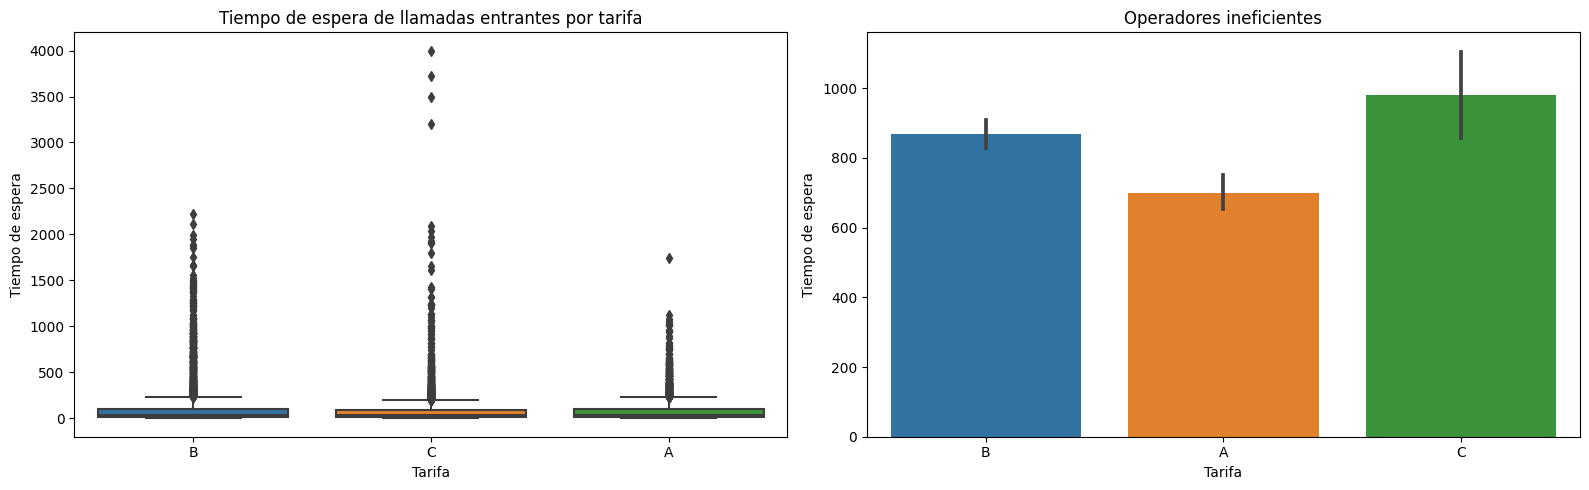

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=llamadas_entrantes,
    x='tariff_plan',
    y='tiempos_espera'
)
plt.title('Tiempo de espera de llamadas entrantes por tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Tiempo de espera')

plt.subplot(1, 2, 2)
sns.barplot(
    data=operadores_ineficientes__tiempo_de_espera,
    x='tariff_plan',
    y='tiempos_espera'
)
plt.title('Operadores ineficientes')
plt.xlabel('Tarifa')
plt.ylabel('Tiempo de espera')

plt.tight_layout()
plt.show()



**Grafica: Tiempo de espera de llamadas entrantes por tarifa.**

Con forme a la grafica boxplot decidi que los operadores ineficientes son los que tienen mas de 500 min de tiempo de espera y el resultado fue que la tarifa C tiene mas operadores ineficientes.





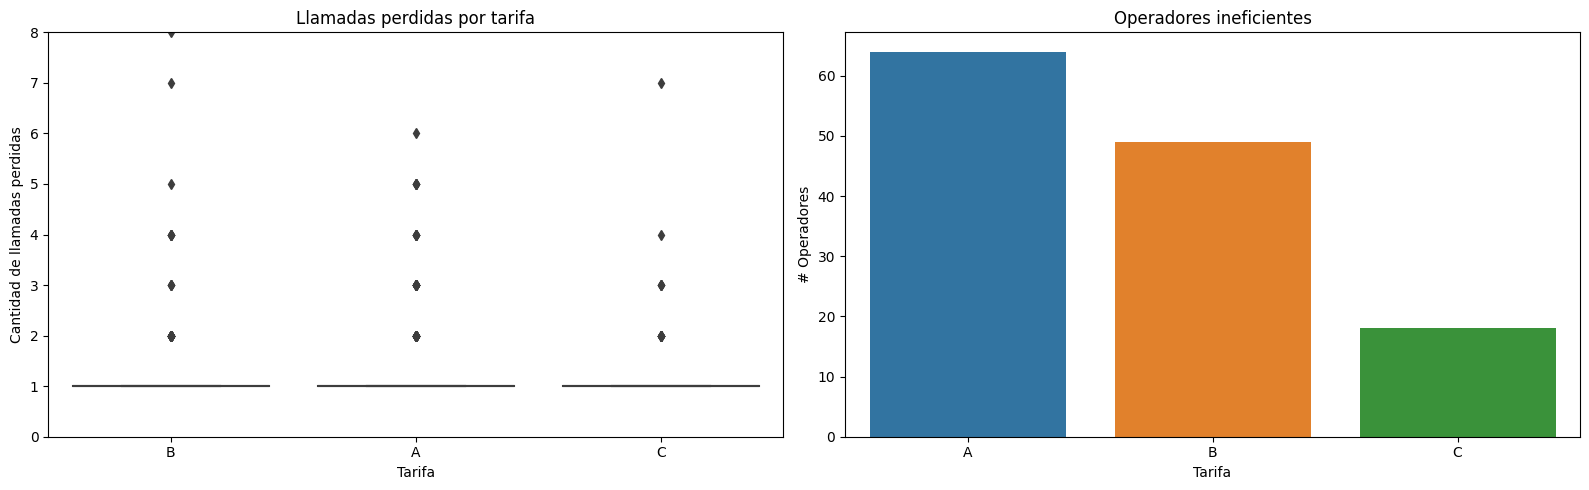

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=tabla_llamadas_entrantes_perdidas,
    x='tariff_plan',
    y='calls_count'
)
plt.ylim([0,8])
plt.title('Llamadas perdidas por tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Cantidad de llamadas perdidas')

plt.subplot(1, 2, 2)
sns.barplot(
    data=operadores_ineficientes__llamadas_entrantes_perdidas,
    x='tariff_plan',
    y='user_id'
)
plt.title('Operadores ineficientes')
plt.xlabel('Tarifa')
plt.ylabel('# Operadores')

plt.tight_layout()
plt.show()


**Grafica: Llamadas perdidas por tarifa.**

Con respecto al boxplot de llamadas perdidas es inusual que un operador tenga mas de una llamada perdida por lo que estableci un umbral de mas de una llamada perdida es ineficiencia.



count    23869.000000
mean        24.943190
std         77.046341
min          1.000000
25%          2.000000
50%          8.000000
75%         23.000000
max       4817.000000
Name: calls_count, dtype: float64


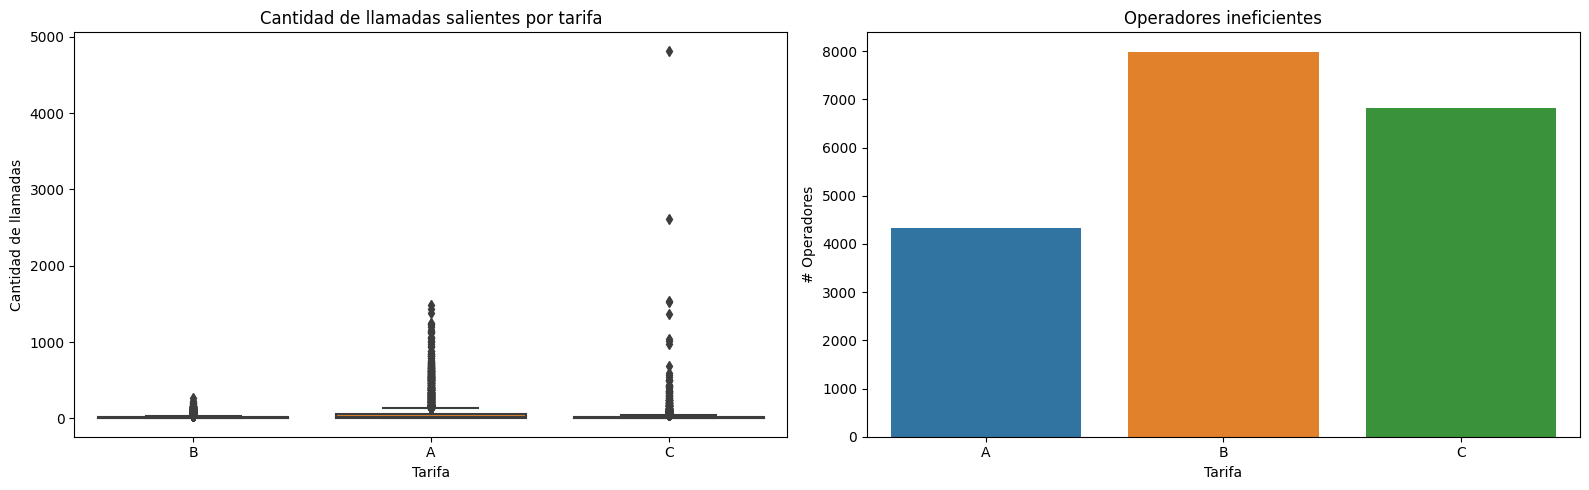

In [ ]:
print(tabla_llamadas_salientes_exteriores['calls_count'].describe())

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=tabla_llamadas_salientes_exteriores,
    x='tariff_plan',
    y='calls_count'
)
plt.title('Cantidad de llamadas salientes por tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Cantidad de llamadas')

plt.subplot(1, 2, 2)
sns.barplot(
    data=operadores_ineficientes_cantidad_llamadas_salientes,
    x='tariff_plan',
    y='user_id'
)
plt.title('Operadores ineficientes')
plt.xlabel('Tarifa')
plt.ylabel('# Operadores')

plt.tight_layout()
plt.show()


**Grafica: Cantidad de llamadas salientes por tarifa.**

No se alcanza a ver bien con el boxplot a apartir de cuando sue vuelve un operador ineficiente con la metrica de llamadas salientes pero con el codigo *print(tabla_llamadas_salientes_exteriores['calls_count'].describe())* podemos observar que el promedio de las llamadas salientes que hacen los operadores son de 25, asi que decidi que los operadores que tengan menos de 25 llamadas salientes son ineficientes.



## 4. Prueba las hipótesis estadísticas
Por ultimo vamos a plantear hipótesis y vamos probarlas para poder dar una conclusion y/o consejos a la compania y reducir costos y/o aumentar ganancias.

* Hipótesis 1:Tiempo de espera para llamadas entrantes del operador

* Hipótesis 2:Promedio de llamadas entrantes perdidas del operador

* Hipótesis 3:Promedio de llamadas salientes del operador


In [ ]:
from scipy.stats  import stats as st
from scipy.stats import ttest_ind
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Hipótesis 1: Tiempo de espera para llamadas entrantes del operador
# Hipótesis Nula (H0): No existe una diferencia significativa en la duracion de tiempo de espera para las llamadas entrantes entre la tarifa A y B.
# Hipótesis Alternativa (H1): Existe una diferencia significativa en la duracion de tiempo de espera para las llamadas entrantes entre la tarifa A y B.

resuults=st.ttest_ind(
    llamadas_entrantes[llamadas_entrantes['tariff_plan']=='A']['tiempos_espera'],
    llamadas_entrantes[llamadas_entrantes['tariff_plan']=='B']['tiempos_espera'])

alpha=0.05
print('valor p:',resuults.pvalue)
if resuults.pvalue<alpha:
  print('Rechazamos la hipotesis nula: Existe diferencia significativa en la duracion de tiempo de espera para las llamadas entrantes entre la tarifa A y B')
else:
  print('No podemos rechazar la hipótesis nula: No existe diferencia significativa en la duracion de tiempo de espera para las llamadas entrantes entre la tarifa A y B')


valor p: 1.222734153588422e-13
Rechazamos la hipotesis nula: Existe diferencia significativa en la duracion de tiempo de espera para las llamadas entrantes entre la tarifa A y B


In [ ]:
# Hipótesis 2:Promedio de llamadas entrantes perdidas del operador
# Hipótesis Nula (H0): No existe diferencia significativa en los promedios de las llamadas perdidas entre la tarifa A y B
# Hipótesis Alternativa (H1): Existe diferencia significativa en los promedios de las llamadas perdidas entre la tarifa A y B

results=st.ttest_ind(
    tabla_llamadas_entrantes_perdidas[tabla_llamadas_entrantes_perdidas['tariff_plan']=='A']['calls_count'],
    tabla_llamadas_entrantes_perdidas[tabla_llamadas_entrantes_perdidas['tariff_plan']=='B']['calls_count'],
    equal_var=False
)

alpha=0.05
print('valor p:',results.pvalue)
if results.pvalue<alpha:
  print('Rechazamos la hipotesis nula: Existe diferencia significativa en los promedios de las llamadas perdidas entre la tarifa A y B')
else:
  print('No podemos rechazar la hipótesis nula:No existe diferencia significativa en los promedios de las llamadas perdidas entre la tarifa A y B')

valor p: 0.16393222208500766
No podemos rechazar la hipótesis nula:No existe diferencia significativa en los promedios de las llamadas perdidas entre la tarifa A y B


In [ ]:
# Hipótesis 3:Promedio de llamadas salientes del operador
# Hipótesis Nula (H0): El promedio de llamadas salientes de los operadores de la tarifa A no es mayor a la tarifa C
# Hipótesis Alternativa (H1): El promedio de llamadas salientes de los operadores de la tarifa A es mayor a la tarifa C

results=st.ttest_ind(
    tabla_llamadas_salientes_exteriores[tabla_llamadas_salientes_exteriores['tariff_plan']=='A']['calls_count'],
    tabla_llamadas_salientes_exteriores[tabla_llamadas_salientes_exteriores['tariff_plan']=='C']['calls_count'],
    alternative='greater'
)

alpha=0.05
print('valor p:',results.pvalue)
if results.pvalue<alpha:
  print('Rechazamos la hipotesis nula: El promedio de llamadas salientes de los operadores de la tarifa A es mayor a la tarifa C')
else:
  print('No podemos rechazar la hipótesis nula: El promedio de llamadas salientes de los operadores de la tarifa A no es mayor a la tarifa C')


valor p: 1.205251239657209e-87
Rechazamos la hipotesis nula: El promedio de llamadas salientes de los operadores de la tarifa A es mayor a la tarifa C


## 5. Recomendaciones

En primer lugar, es crucial investigar las causas subyacentes de los largos tiempos de espera en las llamadas entrantes, especialmente para los operadores de la Tarifa C, donde se observó una mayor ineficiencia. Esto podría implicar una revisión de los sistemas de enrutamiento de llamadas, la dotación de personal y la capacitación en la gestión eficiente del tiempo. En cuanto a las llamadas perdidas, aunque no se encontró una diferencia estadísticamente significativa entre las tarifas, la Tarifa A y B muestran un número considerable de operadores con dos o más llamadas perdidas. Se debe enfocar en mejorar la capacidad de respuesta y la gestión de llamadas entrantes en general, posiblemente a través de alertas mejoradas o sistemas de devolución de llamada. Finalmente, la baja cantidad de llamadas salientes para los operadores de la Tarifa B y C sugiere la necesidad de revisar los procesos de contacto proactivo con el cliente y proporcionar capacitación en técnicas de ventas o seguimiento, asegurando que los operadores estén equipados para maximizar las oportunidades de interacción saliente. La formación continua del personal en habilidades de comunicación y gestión de incidencias, junto con la inversión en tecnología que optimice los flujos de trabajo y la automatización, serán clave para mejorar la eficiencia general.

## 6. Lista de Stakeholders

*   **Gerencia de Operaciones:** Responsables de la eficiencia operativa y el cumplimiento de los niveles de servicio.
*   **Gerencia de Atención al Cliente:** Interesados en la satisfacción del cliente y la reducción de quejas por llamadas perdidas o tiempos de espera.
*   **Equipo de Recursos Humanos:** Encargados de la capacitación, desempeño y bienestar de los operadores.
*   **Departamento de TI/Tecnología:** Responsables del soporte y mejora de los sistemas de telefonía y herramientas de gestión de llamadas.
*   **Gerencia Financiera:** Interesados en la reducción de costos operativos y la maximización de ingresos al evitar la pérdida de clientes.
*   **Operadores de Call Center:** Directamente afectados por las métricas de desempeño y las condiciones de trabajo.